## Imports

In [7]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Functions

In [8]:
def get_popular_name(df: dict) -> dict:
    """
    Group dataframe by State column,
    extract rows correspond to max value in Count column,
    return dataframe with target rows and Name and State columns
    """
    idx = df.groupby(['State'])['Count'].transform(max) == df['Count']
    return df[['Name', 'State']][idx].reset_index(drop=True)

def get_popular_name_by_sex(df: dict) -> dict:
    """
    Group dataframe by both State and Gender columns,
    extract rows correspond to max value in Count column,
    return datafrane with target rows and Name, Gender and State columns
    """
    idx = df.groupby(['State', 'Gender'])['Count'].transform(max) == df['Count']
    return df[['Name', 'Gender', 'State']][idx].reset_index(drop=True)

def get_name_using_years(df: dict, target_year: int) -> dict:
    """
    Filter input dataframe using target_year variable,
    apply get_popular_name function to filtered dataframe,
    return concatenated outputs from two filtered dataframe
    
    """
    before = get_popular_name(df[df.Year < target_year])\
    .rename(columns = {'Name': f'Name_before_{target_year}'})
    after = get_popular_name(df[df.Year >= target_year])[['Name']]\
    .rename(columns = {'Name': f'Name_after_{target_year}'})
    return pd.concat([before, after], axis=1)[['State', f'Name_before_{target_year}', f'Name_after_{target_year}']]

## Data

In [9]:
df = pd.read_csv('~/Загрузки/StateNames.csv', index_col = "Id")

How head is looks like?

In [10]:
df.head()

,Name,Year,Gender,State,Count
Id,,,,,
1,Mary,1910,F,AK,14
2,Annie,1910,F,AK,12
3,Anna,1910,F,AK,10
4,Margaret,1910,F,AK,8
5,Helen,1910,F,AK,7


Let's investigate the column types

In [11]:
df.dtypes

Name      object
Year       int64
Gender    object
State     object
Count      int64
dtype: object

## 1st task
**Which name was the most popular in each state before and after 1990 year?**

In [12]:
get_name_using_years(df, 1990)

,State,Name_before_1990,Name_after_1990
0,AK,Michael,Michael
1,AL,James,Christopher
2,AR,James,Christopher
3,AZ,Michael,Michael
4,CA,Michael,Michael
5,CO,Linda,Michael
6,CT,Robert,Michael
7,DC,John,Michael
8,DE,Michael,Michael
9,FL,Michael,Michael


## 2nd task
**Which are top 3 of the most popular names in 1990-2000 years separately among boys and girls in three states selected by you?**

Choosen states: AK, AL, AR

In [13]:
get_popular_name_by_sex(df.loc[(df.State.isin(['AK', 'AL', 'AR'])) & (df.Year >= 1990) & (df.Year < 2000)])

,Name,Gender,State
0,Jessica,F,AK
1,Michael,M,AK
2,Ashley,F,AL
3,Christopher,M,AL
4,Jessica,F,AR
5,Christopher,M,AR


## 3rd task & Visualization
**Dynamics of three names selected by you in those three states starting from 1990 year**

Choosen states: AK, AL, AR

Choosen names: Jessica, Ashley, James

In [14]:
prepared_df = df.loc[(df.State.isin(['AK', 'AL', 'AR'])) &\
              (df.Year >= 1990) &\
              df.Name.isin(['Jessica',
                            'Ashley',
                            'James'])]
prepared_df.head()

,Name,Year,Gender,State,Count
Id,,,,,
8496,Jessica,1990,F,AK,112
8497,Ashley,1990,F,AK,96
8711,Jessica,1991,F,AK,107
8712,Ashley,1991,F,AK,103
8938,Jessica,1992,F,AK,102


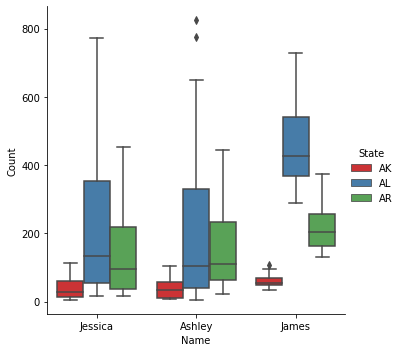

In [16]:
box_per_state = sns.catplot(x="Name", y="Count", hue='State', data=prepared_df, palette="Set1", kind="box")

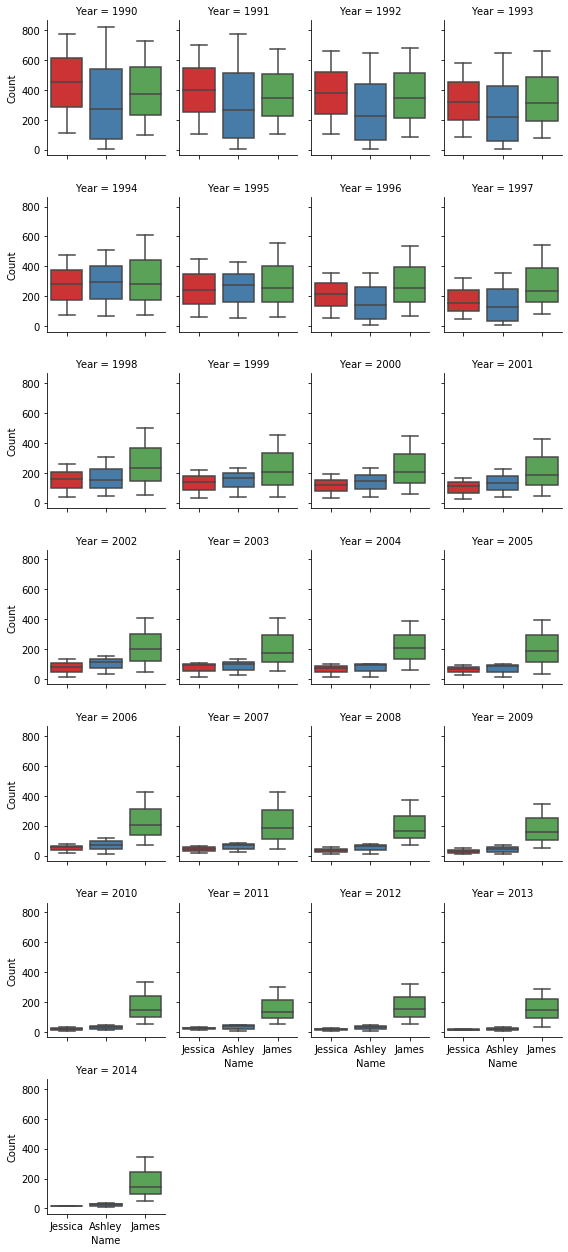

In [17]:
box_per_year = sns.catplot(x="Name", y="Count", col="Year", col_wrap=4,
                data=prepared_df,
                kind="box", height=2.5, aspect=.8, palette="Set1")